# Ce TP est réalisé par le quadrinome :
         Mekdoud Rachid
         Mokhbat Selma
         Kerdjoudj Mohamed
         Hezouat Abdeldjalil

# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from utils import separate_labels

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [34]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=np.float32)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [35]:
# rajoutons l'ordonnée à l'origine theta 0
X, y = separate_labels(data)

In [36]:
X.shape

(97, 2)

In [37]:
y.shape 

(97,)

In [38]:
def model(X: np.ndarray, theta):
    return np.dot(X, theta)

Text(0, 0.5, 'Bénéfice x1000')

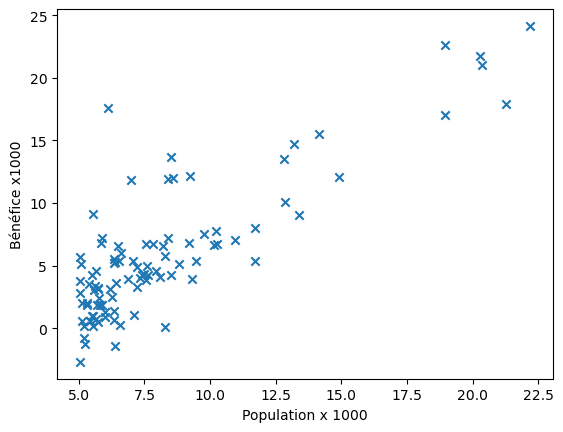

In [39]:
# traçons ces données pour visualisation
plt.scatter(X[:,1], y, marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [40]:
def computeCostNonVect(X, y, theta):
    # Number of training examples
    m = y.size
    
    # Initialize cost
    cost = 0
    for x_i, y_i in zip(X[:, 1], y):
        # Compute hypothesis for example i
        h = theta[0] + theta[1] * x_i
        
        # Update cost
        cost += (h - y_i)**2
    
    # Scale cost by 1/2m
    return cost / (2 * m)

In [41]:
X.shape

(97, 2)

In [42]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte

    return np.average((np.dot(X, theta) - y)**2) / 2

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [43]:
def computeGradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray):
    # predicted values for each example
    h = model(X, theta)
    # A, B two matrices, A * B is the sum of the dot product of rows of A and columns of B
    return np.dot(X.T, h - y) / y.size

In [44]:
def gradientDescent(X, y, theta, alpha, iterations, show_cost_each=100):
    # initialize some useful values
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        # compute gradients
        gradients = computeGradient(X, y, theta)
        # update theta
        theta = theta - alpha * gradients
        
        # compute cost
        cost_history[i] = computeCost(X, y, theta)
        
        # print the cost every 100 iterations
        if i % show_cost_each == 0:
            print(f"Cost at iteration {i}: {cost_history[i]}")
    
    return theta, cost_history

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [45]:
theta = np.zeros((2))
theta

array([0., 0.])

Calculer le cout initial

In [46]:
computeCost(X, y, theta) 

32.07273421977694

Appel des la fonction de calcul du gradient

In [47]:
# paramètres
iterations = 1500
alpha = 0.01
# Appel
theta , cost_history = gradientDescent(X, y, theta, alpha, iterations)
# Print the final parameter values
print(f"Final parameter values: {theta}")

Cost at iteration 0: 6.737190576870885
Cost at iteration 100: 5.476362741051096
Cost at iteration 200: 5.173634436190287
Cost at iteration 300: 4.962606349738605
Cost at iteration 400: 4.815501329968701
Cost at iteration 500: 4.712956274448528
Cost at iteration 600: 4.641473408479145
Cost at iteration 700: 4.591643603411739
Cost at iteration 800: 4.5569078742354705
Cost at iteration 900: 4.532694035153124
Cost at iteration 1000: 4.515814873062396
Cost at iteration 1100: 4.5040486218737215
Cost at iteration 1200: 4.495846516443913
Cost at iteration 1300: 4.4901289321085995
Cost at iteration 1400: 4.486143276119274
Final parameter values: [-3.63029171  1.16636239]


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

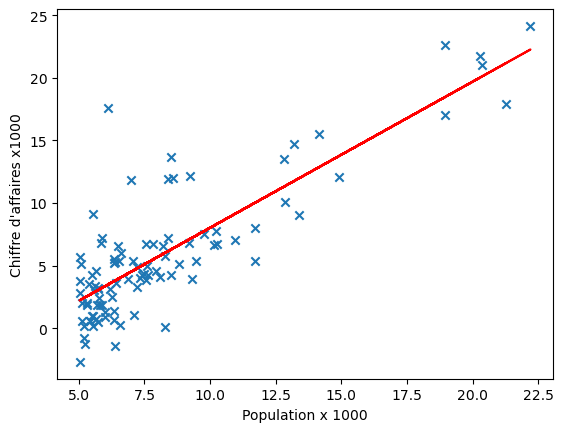

In [48]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel("Chiffre d'affaires x1000")   
# tracé de la droite de régression
plt.plot(X[:,1],y_pred,'r-')
plt.show()

Traçage du coût en fonction de theta0 et theta1

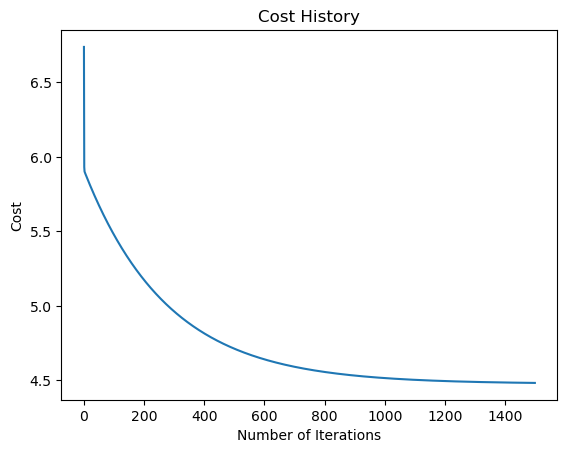

In [49]:
# plot cost history
plt.plot(range(iterations), cost_history)
plt.title('Cost History')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

Prédire des valeurs de y

In [50]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = model([1, 3.5],theta)
predict1

0.4519766663365048

In [51]:
predict2 = model([1, 7],theta)
predict2

4.53424504364515

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [52]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=np.float32)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [53]:
# d'abord créer X et y
X, y = separate_labels(dataMulti)
X.shape, y.shape

((47, 3), (47,))

In [54]:
n_examples, n_cols = dataMulti.shape

Appliquer la descente du gradient à plusieurs variables

Sans normalisation

In [55]:
iterations = 101
alpha = 4e-7
theta = np.zeros(X.shape[1])
final_theta, cost_history = gradientDescent(X, y, theta, alpha, iterations, show_cost_each=20)
print(f"Final cost: {cost_history[-1] / 10 **9} billions")
final_theta

Cost at iteration 0: 47877122830.99939
Cost at iteration 20: 2461042098.08053
Cost at iteration 40: 2397943626.921158
Cost at iteration 60: 2397853039.1930594
Cost at iteration 80: 2397849986.954789
Cost at iteration 100: 2397847056.3749313
Final cost: 2.3978470563749315 billions


array([  0.45675609, 165.38177114,   0.90934518])

Mise à l'échelle des données

In [56]:
print(X.max())
X_scaled = X / 1000
X_scaled
X_scaled.max(), X_scaled.min()

4478.0


(4.478, 0.001)

Normalisation des données en moyenne = 0

In [57]:
X_scaled_means = X_scaled.mean(axis=0)
X_normlaized = (X_scaled - X_scaled_means) / X_scaled.std(axis=0)

Avec normalisation

In [58]:
theta = np.zeros(n_cols)
alpha = 1
iterations = 101
# Appel
theta_final, cost_history = gradientDescent(X_normlaized, y, theta, alpha, iterations, show_cost_each=20)
# Print the final parameter values
print(f"Final parameter values: {theta_final}")
print(f"Final cost: {cost_history[-1] / 10 **9} billions")
theta.shape

Cost at iteration 0: 3801705559.061136
Cost at iteration 20: 2043280477.5410368
Cost at iteration 40: 2043280477.3925707
Cost at iteration 60: 2043280477.3925707
Cost at iteration 80: 2043280477.3925703
Cost at iteration 100: 2043280477.3925707
Final parameter values: [-340412.76595745  109447.76551898   -6578.27679028]
Final cost: 2.0432804773925706 billions


(3,)

# **Avant entrainement**

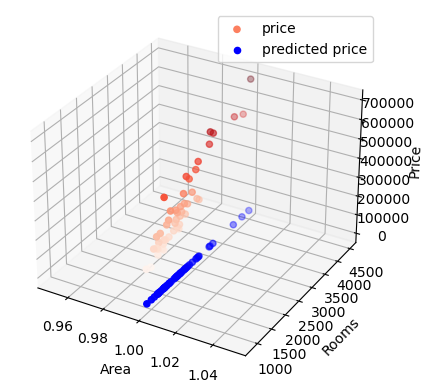

In [59]:
x1 = X[:,0].reshape(n_examples,1)
x2 = X[:,1].reshape(n_examples,1)
ax = plt.axes(projection='3d')
ax.set_xlabel('Area')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')

ax.scatter3D(x1, x2,y, c=y, cmap='Reds')
ax.scatter3D(x1,x2,model(X,theta),c='b')
ax.legend(["price","predicted price"])

Coast History

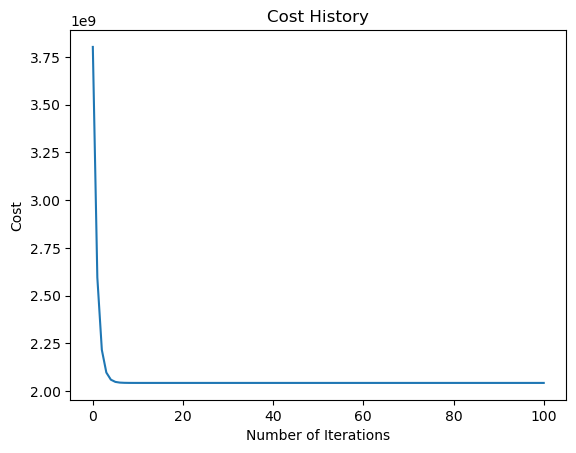

In [60]:
# plot cost history
plt.plot(range(iterations), cost_history)
plt.title('Cost History')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

# Apres Entrainement

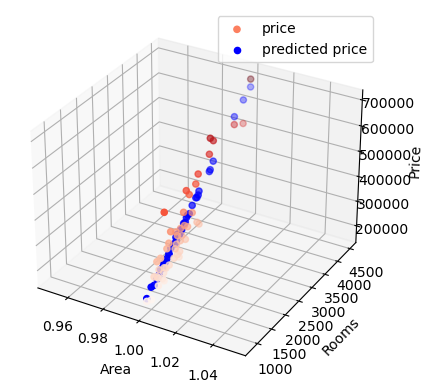

In [61]:
ax = plt.axes(projection='3d')
ax.set_xlabel('Area')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')

ax.scatter3D( x1,x2,y,c=y, cmap='Reds')
ax.scatter3D(x1,x2,model(X_normlaized,theta_final),c='b')
ax.legend(["price","predicted price"])

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [62]:
import time
# Without normalization
start_time = time.time()
theta, cost_history = gradientDescent(X, y, theta, alpha, iterations)
end_time = time.time()
print("Temps sans normalisation :", end_time - start_time)

# With normalization
theta_norm = np.zeros((X_normlaized.shape[1], 1))
start_time = time.time()
theta_norm, cost_history_norm = gradientDescent(X_normlaized, y, theta_norm, alpha, iterations)
end_time = time.time()
print("Temps avec normalisation :", end_time - start_time)

Cost at iteration 0: 1.349327281169496e+24
Cost at iteration 100: nan
Temps sans normalisation : 0.0049648284912109375
Cost at iteration 0: 6.717009616359796e-19
Cost at iteration 100: 0.0
Temps avec normalisation : 0.0050547122955322266


C:\Users\rachi\AppData\Local\Temp\ipykernel_7140\2459945658.py:4: RuntimeWarning: overflow encountered in square
  return np.average((np.dot(X, theta) - y)**2) / 2
C:\Users\rachi\AppData\Local\Temp\ipykernel_7140\3718912020.py:9: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * gradients


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [63]:
regression_model = LinearRegression()
regression_model.fit(X_normlaized, y)
computeCost(X_normlaized, y, regression_model.coef_)

59983706090.79234

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

- Enrichir le dataset avec d'autres exemples.
- Ajouter autres features.

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].
Le délai est le vendredi 11Avril 2023 

In [64]:
# bonne chance      TP propose par Dr I.Setitra